In [81]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [82]:
data = pd.read_csv("df_regression.csv")
data.columns

Index(['Unnamed: 0', 'Model Name', 'Dataset', 'Subset ID', 'Is Filtered',
       'Sensitive Feature', 'ndcg@5', 'recall@5', 'mrr@5',
       'Differential Fairness of sensitive attribute', 'giniindex@5',
       'popularitypercentage@5', 'Value Unfairness of sensitive attribute',
       'Absolute Unfairness of sensitive attribute',
       'Underestimation Unfairness of sensitive attribute',
       'Overestimation Unfairness of sensitive attribute',
       'NonParity Unfairness of sensitive attribute', 'Absolute Difference',
       'KS Statistic of sensitive attribute', 'Generalized Cross Entropy',
       'hit@5', 'Number of Users', 'Number of Items', 'Number of Ratings',
       'Space Size', 'Shape', 'Density', 'Rating per User', 'Rating per Item',
       'Gini Item', 'Gini User', 'Average Popularity',
       'Standart Deviation of Popularity Bias', 'Skewness of Popularity Bias',
       'Kurtosis of Popularity Bias', 'Average Long Tail Items',
       'Standart Deviation of Long Tail Item

In [83]:
data_age = pd.read_csv("../stats/stats_ml1m_age.csv")
data_age["Sensitive Feature"] = "age"
data_gender = pd.read_csv("../stats/stats_ml1m_gender.csv")
data_gender["Sensitive Feature"] = "gender"
data_bx = pd.read_csv("../stats/stats_bx_age.csv")
data_bx["Sensitive Feature"] = "age"
data = pd.concat([data_age, data_gender, data_bx])
data

,Dataset,Subset ID,Is Filtered,Number of Users,Number of Items,Number of Ratings,Space Size,Shape,Density,Rating per User,...,Skewness of Long Tail Items,Kurtosis of Long Tail Items,Mean Rating,Standart Deviation of Rating,Skewness of Rating,Kurtosis of Rating,Sensitive Attribute == 0 Percentage,Sensitive Attribute == 1 Percentage,Difference between Sensitive Attribute Percentage,Sensitive Feature
0,ml1m,1,Yes,273,1122,11957,306306,0.243,0.039,43.799,...,1.674,2.563,3.492,1.172,-0.521,-0.467,23.81,76.19,52.38,age
1,ml1m,2,Yes,1622,1196,66286,1939912,1.356,0.034,40.867,...,2.056,6.095,3.601,1.123,-0.583,-0.323,19.79,80.21,60.42,age
2,ml1m,3,Yes,961,766,23594,736126,1.255,0.032,24.552,...,2.119,5.937,3.548,1.133,-0.530,-0.417,23.00,77.00,54.00,age
3,ml1m,4,Yes,753,1493,39148,1124229,0.504,0.035,51.989,...,2.441,9.134,3.565,1.131,-0.542,-0.404,22.97,77.03,54.06,age
4,ml1m,5,Yes,167,1341,9504,223947,0.125,0.042,56.910,...,2.977,11.419,3.607,1.104,-0.545,-0.349,26.35,73.65,47.30,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BX,96,Yes,1450,3057,18537,4432650,0.474,0.004,12.784,...,1.697,3.262,1.983,1.523,1.046,-0.664,39.66,60.34,20.68,age
96,BX,97,Yes,215,1485,2769,319275,0.145,0.009,12.879,...,1.726,2.957,1.861,1.488,1.266,-0.191,40.93,59.07,18.14,age
97,BX,98,Yes,4607,3081,57278,14194167,1.495,0.004,12.433,...,1.646,3.079,2.030,1.547,0.975,-0.817,39.53,60.47,20.94,age
98,BX,99,Yes,1057,3450,15808,3646650,0.306,0.004,14.956,...,1.832,4.304,1.979,1.527,1.055,-0.655,39.92,60.08,20.16,age


In [84]:
ml1_age = data[(data["Dataset"] == "ml1m") & (data["Sensitive Feature"] == "Age")]

In [85]:
ml1_gender = data[(data["Dataset"] == "ml1m") & (data["Sensitive Feature"] == "Gender")]

In [86]:
bx_age = data[(data["Dataset"] == "BX") & (data["Sensitive Feature"] == "Age")]

In [87]:
data.columns

Index(['Dataset', 'Subset ID', 'Is Filtered', 'Number of Users',
       'Number of Items', 'Number of Ratings', 'Space Size', 'Shape',
       'Density', 'Rating per User', 'Rating per Item', 'Gini Item',
       'Gini User', 'Average Popularity',
       'Standart Deviation of Popularity Bias', 'Skewness of Popularity Bias',
       'Kurtosis of Popularity Bias', 'Average Long Tail Items',
       'Standart Deviation of Long Tail Items', 'Skewness of Long Tail Items',
       'Kurtosis of Long Tail Items', 'Mean Rating',
       'Standart Deviation of Rating', 'Skewness of Rating',
       'Kurtosis of Rating', 'Sensitive Attribute == 0 Percentage',
       'Sensitive Attribute == 1 Percentage',
       'Difference between Sensitive Attribute Percentage',
       'Sensitive Feature'],
      dtype='object')

In [88]:
bx_age = bx_age.iloc[:, 3:-4]
ml1_age = ml1_age.iloc[:, 3:-4]
ml1_gender = ml1_gender.iloc[:, 3:-4]
data = data.iloc[:, 3:-4]

In [89]:
data.columns

Index(['Number of Users', 'Number of Items', 'Number of Ratings', 'Space Size',
       'Shape', 'Density', 'Rating per User', 'Rating per Item', 'Gini Item',
       'Gini User', 'Average Popularity',
       'Standart Deviation of Popularity Bias', 'Skewness of Popularity Bias',
       'Kurtosis of Popularity Bias', 'Average Long Tail Items',
       'Standart Deviation of Long Tail Items', 'Skewness of Long Tail Items',
       'Kurtosis of Long Tail Items', 'Mean Rating',
       'Standart Deviation of Rating', 'Skewness of Rating',
       'Kurtosis of Rating'],
      dtype='object')

In [110]:
#Calculate correlation matrix for each data
corr_ml1_age = ml1_age.corr()
corr_ml1_gender = ml1_gender.corr()
corr_bx_age = bx_age.corr()
corr_data = data.corr(method='spearman')

<Axes: >

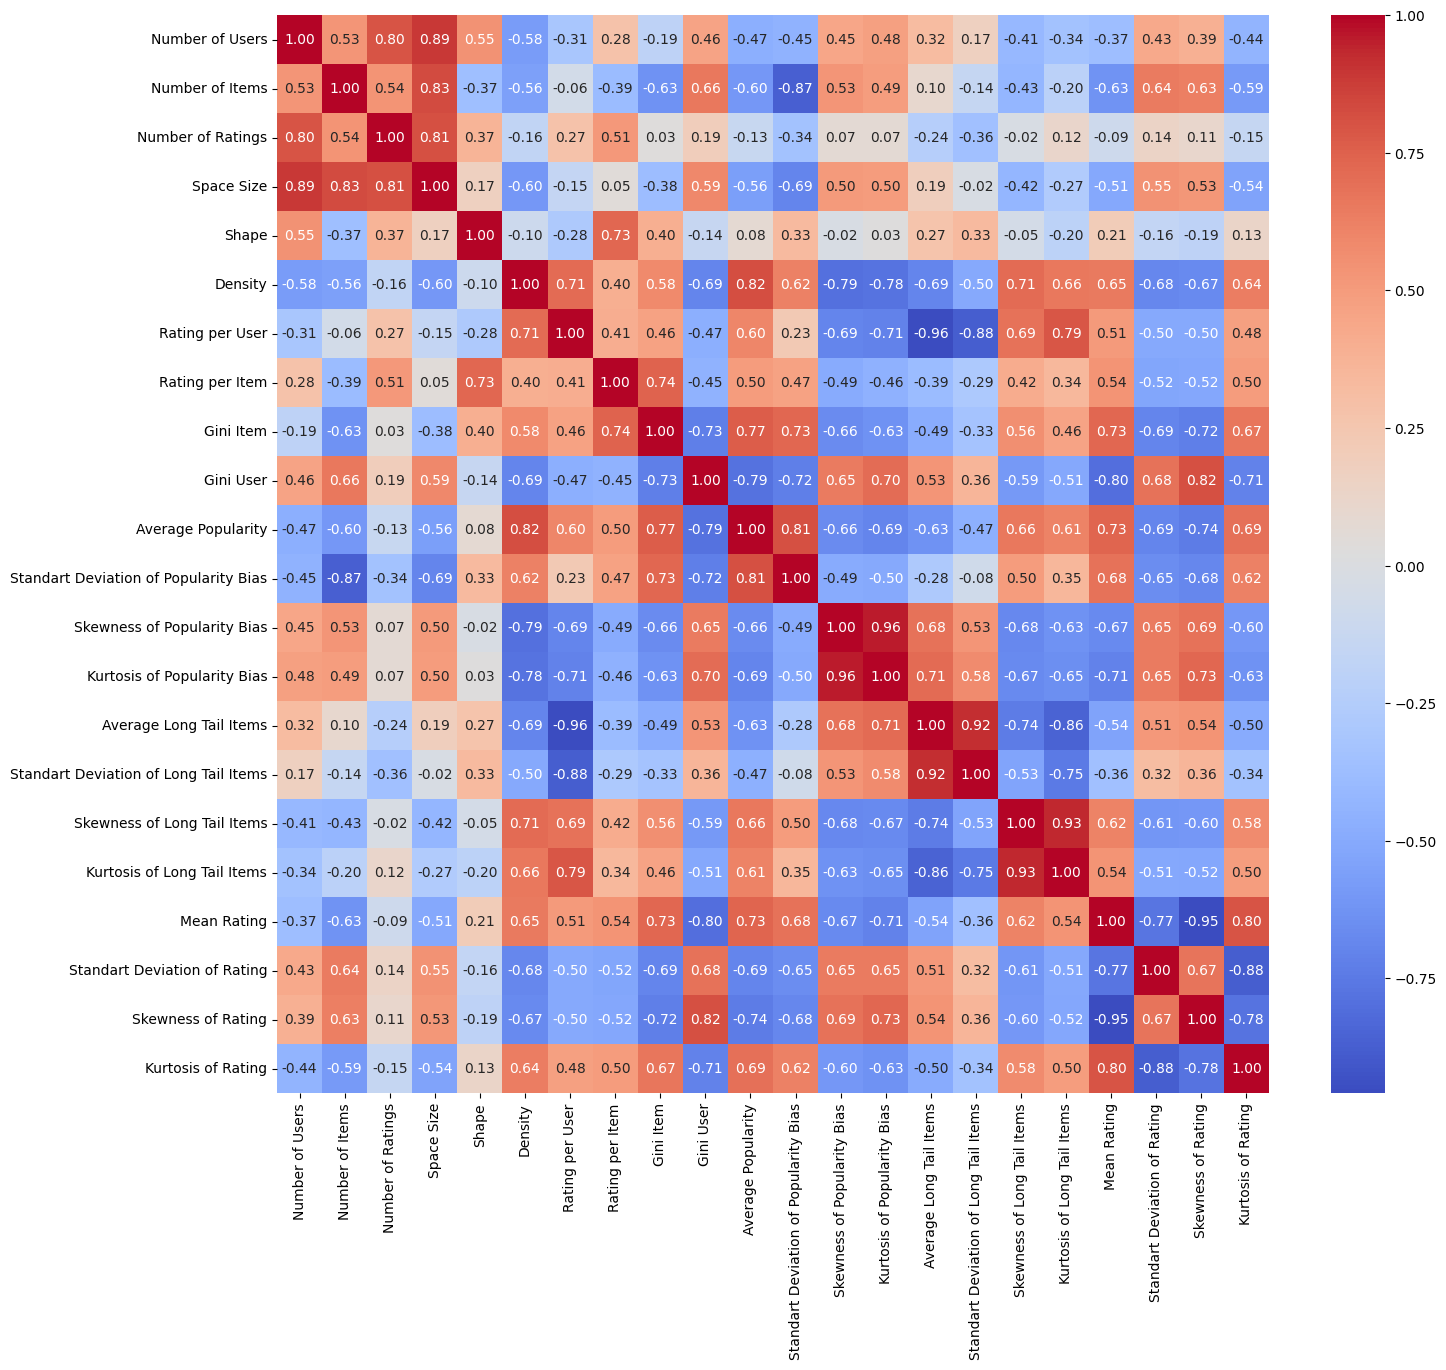

In [111]:
#Plot correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_data,annot=True,fmt=".2f", cmap='coolwarm')

In [112]:
"""
plt.figure(figsize=(16, 14))
sns.heatmap(corr_data, annot=True,fmt=".2f",cmap='coolwarm')

# Save the heatmap as a high-resolution image
output_path = "feature_correlation_heatmap.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

"""

'\nplt.figure(figsize=(16, 14))\nsns.heatmap(corr_data, annot=True,fmt=".2f",cmap=\'coolwarm\')\n\n# Save the heatmap as a high-resolution image\noutput_path = "feature_correlation_heatmap.png"\nplt.savefig(output_path, dpi=300, bbox_inches=\'tight\')\nplt.close()\n\n'

In [113]:
threshold = 0.7

# Find highly correlated pairs
upper_triangle = corr_data.where(np.triu(np.ones(corr_data.shape), k=1).astype(bool))

# Find column pairs where correlation > threshold
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop one of each pair (keep the first occurrence)
df_reduced = corr_data.drop(columns=highly_correlated)

# Print results
print(f"Columns to drop: {len(highly_correlated)}")
print(highly_correlated)

Columns to drop: 15
['Number of Ratings', 'Space Size', 'Rating per User', 'Rating per Item', 'Gini Item', 'Average Popularity', 'Standart Deviation of Popularity Bias', 'Kurtosis of Popularity Bias', 'Average Long Tail Items', 'Standart Deviation of Long Tail Items', 'Skewness of Long Tail Items', 'Kurtosis of Long Tail Items', 'Mean Rating', 'Skewness of Rating', 'Kurtosis of Rating']


In [105]:
set(data.columns) - set(highly_correlated)

{'Density',
 'Gini User',
 'Number of Items',
 'Number of Users',
 'Shape',
 'Skewness of Popularity Bias',
 'Standart Deviation of Rating'}

In [72]:
def drop_features(data,threshold):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(data[to_drop], axis=1)

ml1_age_dropped_8 = drop_features(ml1_age.copy(), 0.8)
ml1_gender_dropped_8 = drop_features(ml1_gender.copy(), 0.8)
bx_age_dropped_8 = drop_features(bx_age.copy(), 0.8)
data_8 = drop_features(data.copy(), 0.8)

ml1_age_dropped_7 = drop_features(ml1_age.copy(), 0.7)
ml1_gender_dropped_7 = drop_features(ml1_gender.copy(), 0.7)
bx_age_dropped_7 = drop_features(bx_age.copy(), 0.7)
data_7 = drop_features(data.copy(), 0.7)

ml1_age_dropped_6 = drop_features(ml1_age.copy(), 0.6)
ml1_gender_dropped_6 = drop_features(ml1_gender.copy(), 0.6)
bx_age_dropped_6 = drop_features(bx_age.copy(), 0.6)
data_6 = drop_features(data.copy(), 0.6)

In [75]:
len(dropped_features_data_8)

15

In [74]:
#Find the dropped features
dropped_features_ml1_age_8 = [col for col in ml1_age.columns if col not in ml1_age_dropped_8.columns]
dropped_features_ml1_gender_8 = [col for col in ml1_gender.columns if col not in ml1_gender_dropped_8.columns]
dropped_features_bx_age_8 = [col for col in bx_age.columns if col not in bx_age_dropped_8.columns]
dropped_features_data_8 = [col for col in data.columns if col not in data_8.columns]

dropped_features_ml1_age_7 = [col for col in ml1_age.columns if col not in ml1_age_dropped_7.columns]
dropped_features_ml1_gender_7 = [col for col in ml1_gender.columns if col not in ml1_gender_dropped_7.columns]
dropped_features_bx_age_7 = [col for col in bx_age.columns if col not in bx_age_dropped_7.columns]
dropped_features_data_7 = [col for col in data.columns if col not in data_7.columns]

drop_features_ml1_age_6 = [col for col in ml1_age.columns if col not in ml1_age_dropped_6.columns]
dropped_features_ml1_gender_6 = [col for col in ml1_gender.columns if col not in ml1_gender_dropped_6.columns]
dropped_features_bx_age_6 = [col for col in bx_age.columns if col not in bx_age_dropped_6.columns]
dropped_features_data_6 = [col for col in data.columns if col not in data_6.columns]

In [29]:
dropped_features_bx_age_8, dropped_features_ml1_gender_8,dropped_features_data_8

(['Number of Ratings',
  'Space Size',
  'Shape',
  'Rating per User',
  'Rating per Item',
  'Gini Item',
  'Kurtosis of Popularity Bias',
  'Average Long Tail Items',
  'Standart Deviation of Long Tail Items',
  'Kurtosis of Long Tail Items',
  'Standart Deviation of Rating',
  'Skewness of Rating',
  'Kurtosis of Rating'],
 ['Space Size',
  'Rating per User',
  'Rating per Item',
  'Kurtosis of Popularity Bias',
  'Average Long Tail Items',
  'Standart Deviation of Long Tail Items',
  'Kurtosis of Long Tail Items',
  'Skewness of Rating'],
 ['Space Size',
  'Density',
  'Gini Item',
  'Gini User',
  'Average Popularity',
  'Standart Deviation of Popularity Bias',
  'Skewness of Popularity Bias',
  'Kurtosis of Popularity Bias',
  'Average Long Tail Items',
  'Standart Deviation of Long Tail Items',
  'Kurtosis of Long Tail Items',
  'Mean Rating',
  'Standart Deviation of Rating',
  'Skewness of Rating',
  'Kurtosis of Rating'])

<Axes: >

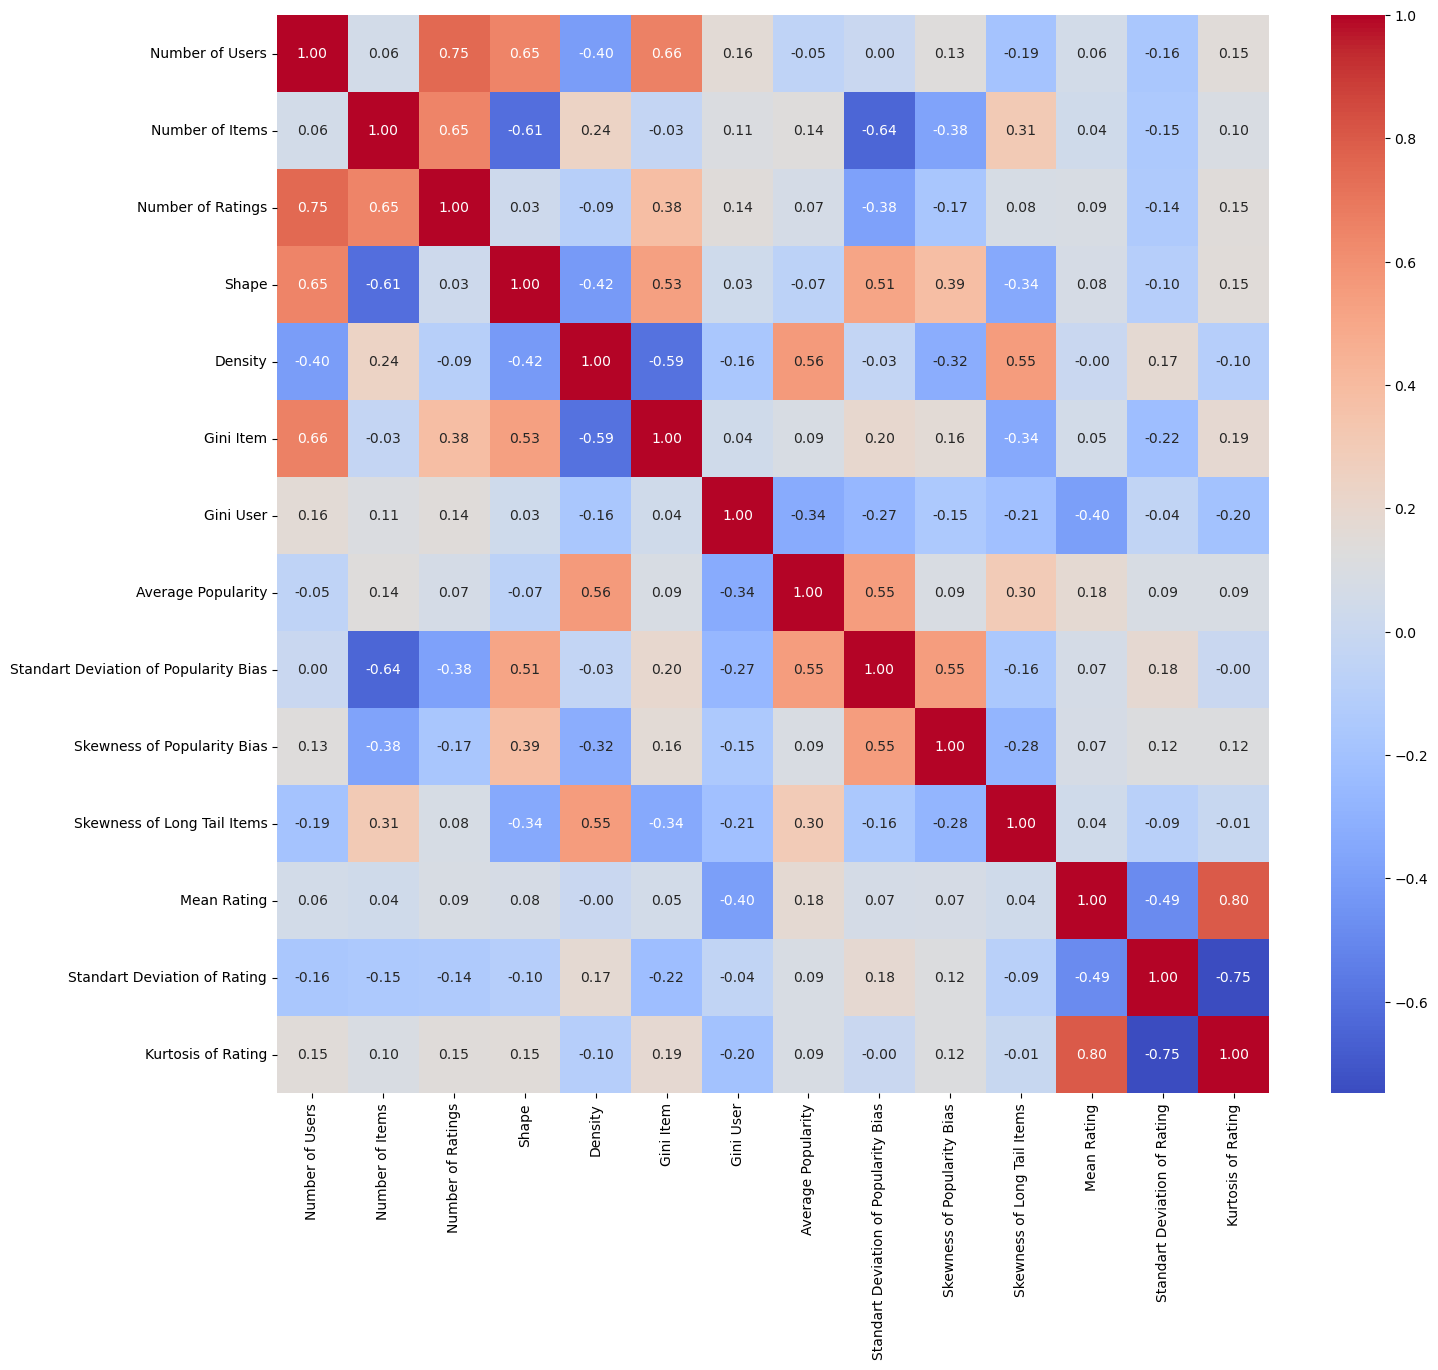

In [30]:
#Correlation matrix after dropping features
corr_ml1_age_after_8 = ml1_age_dropped_8.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_ml1_age_after_8,annot=True,fmt=".2f", cmap='coolwarm')

<Axes: >

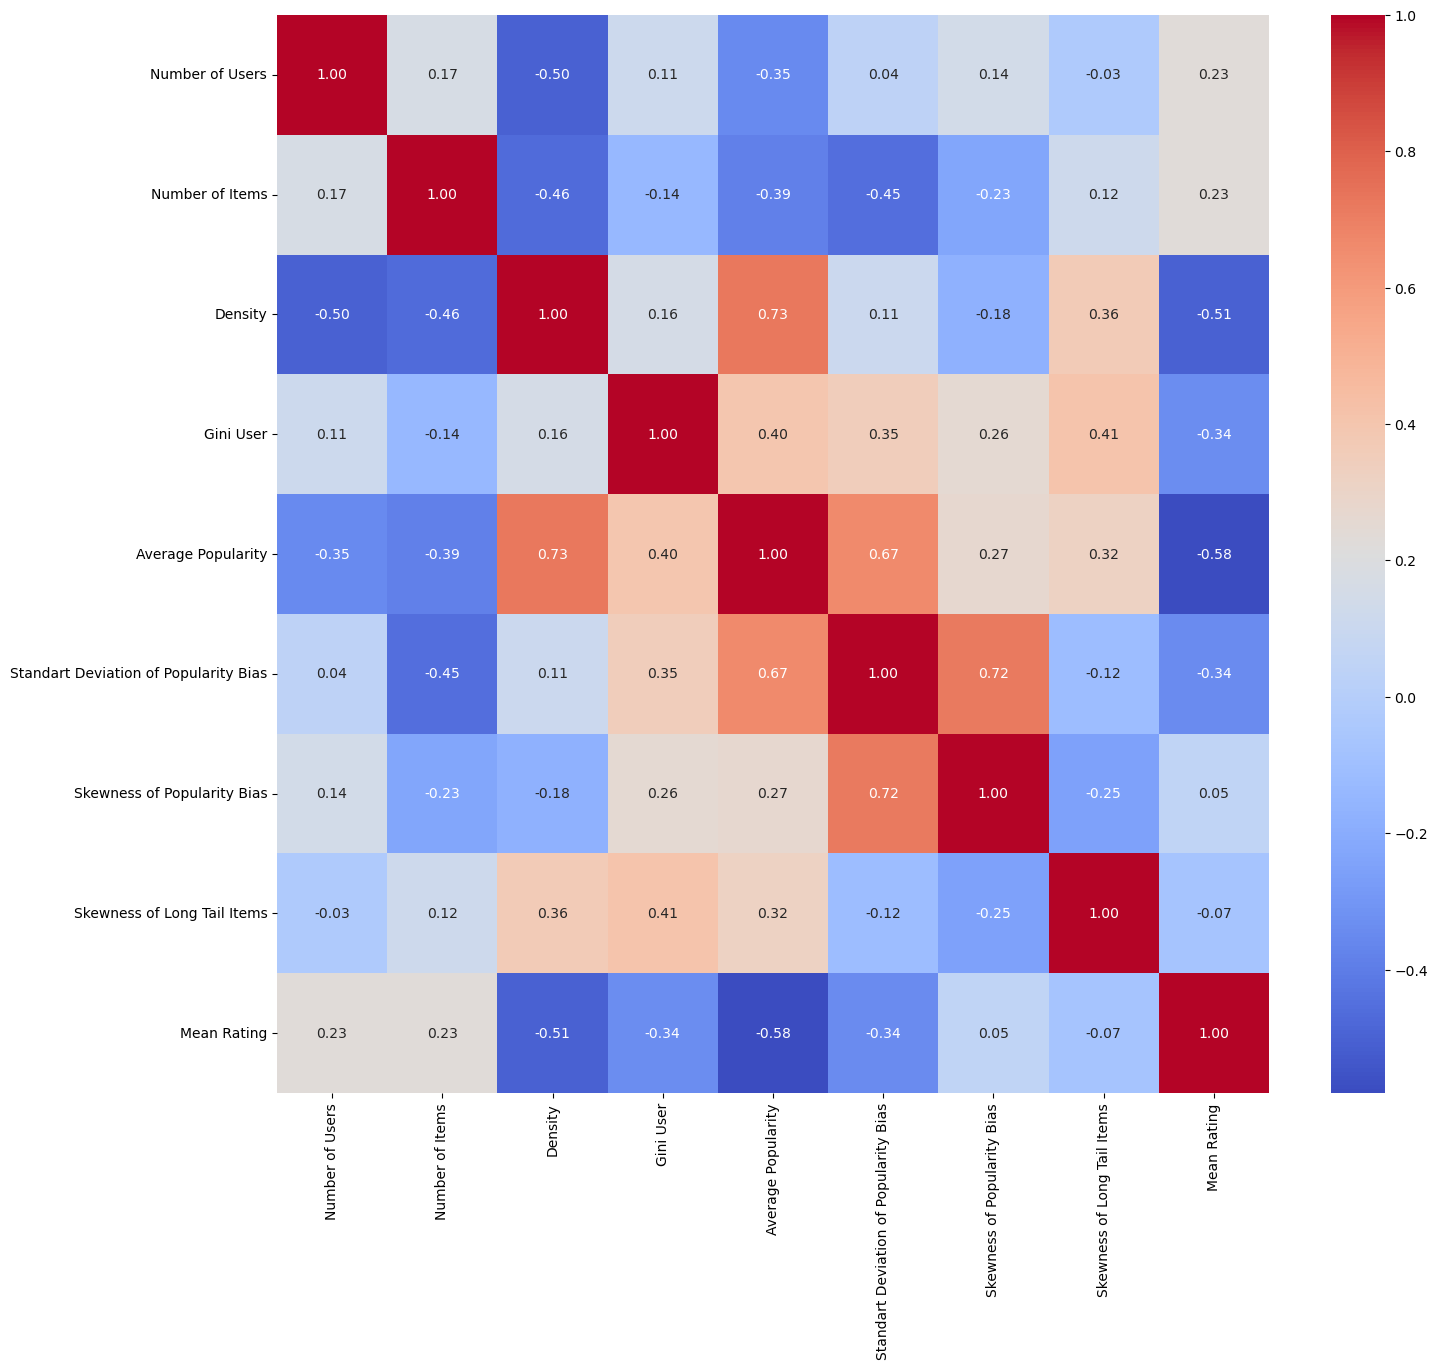

In [31]:
bx_age_dropped_8 = bx_age_dropped_8.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(bx_age_dropped_8,annot=True,fmt=".2f", cmap='coolwarm')

TypeError: bad operand type for unary -: 'Axes'

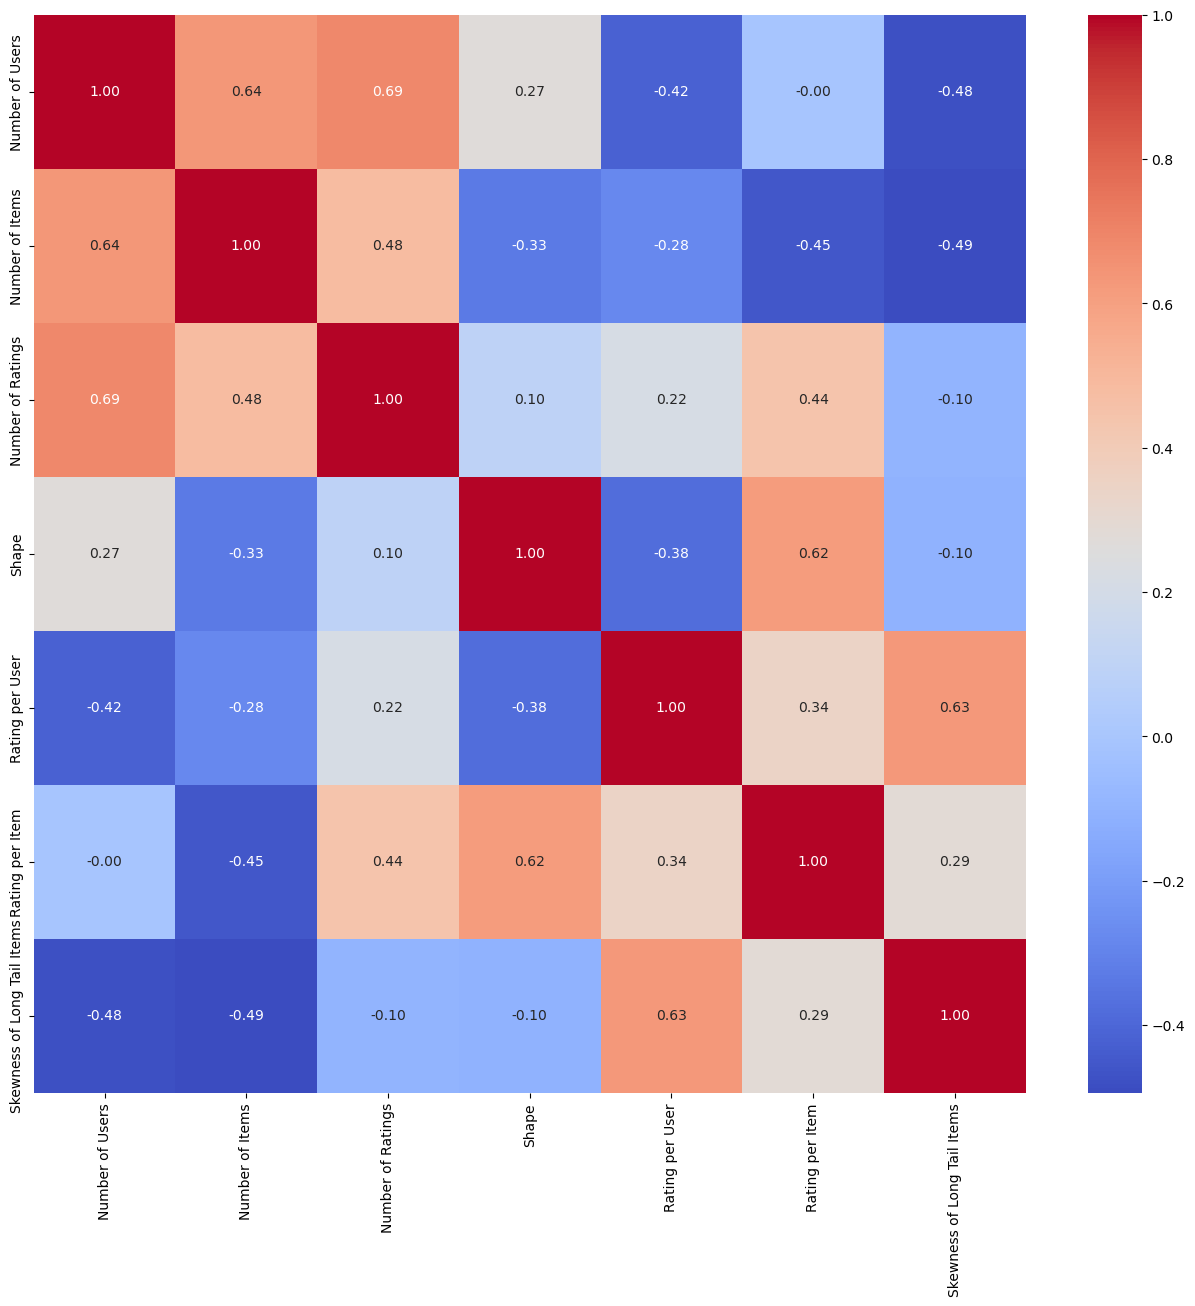

In [32]:
data_8 = data_8.corr()
plt.figure(figsize=(16, 14))
-sns.heatmap(data_8,annot=True,fmt=".2f", cmap='coolwarm')

In [ ]:
ml1_age_dropped_7 = ml1_age_dropped_7.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(ml1_age_dropped_7,annot=True,fmt=".2f", cmap='coolwarm')

<Axes: >

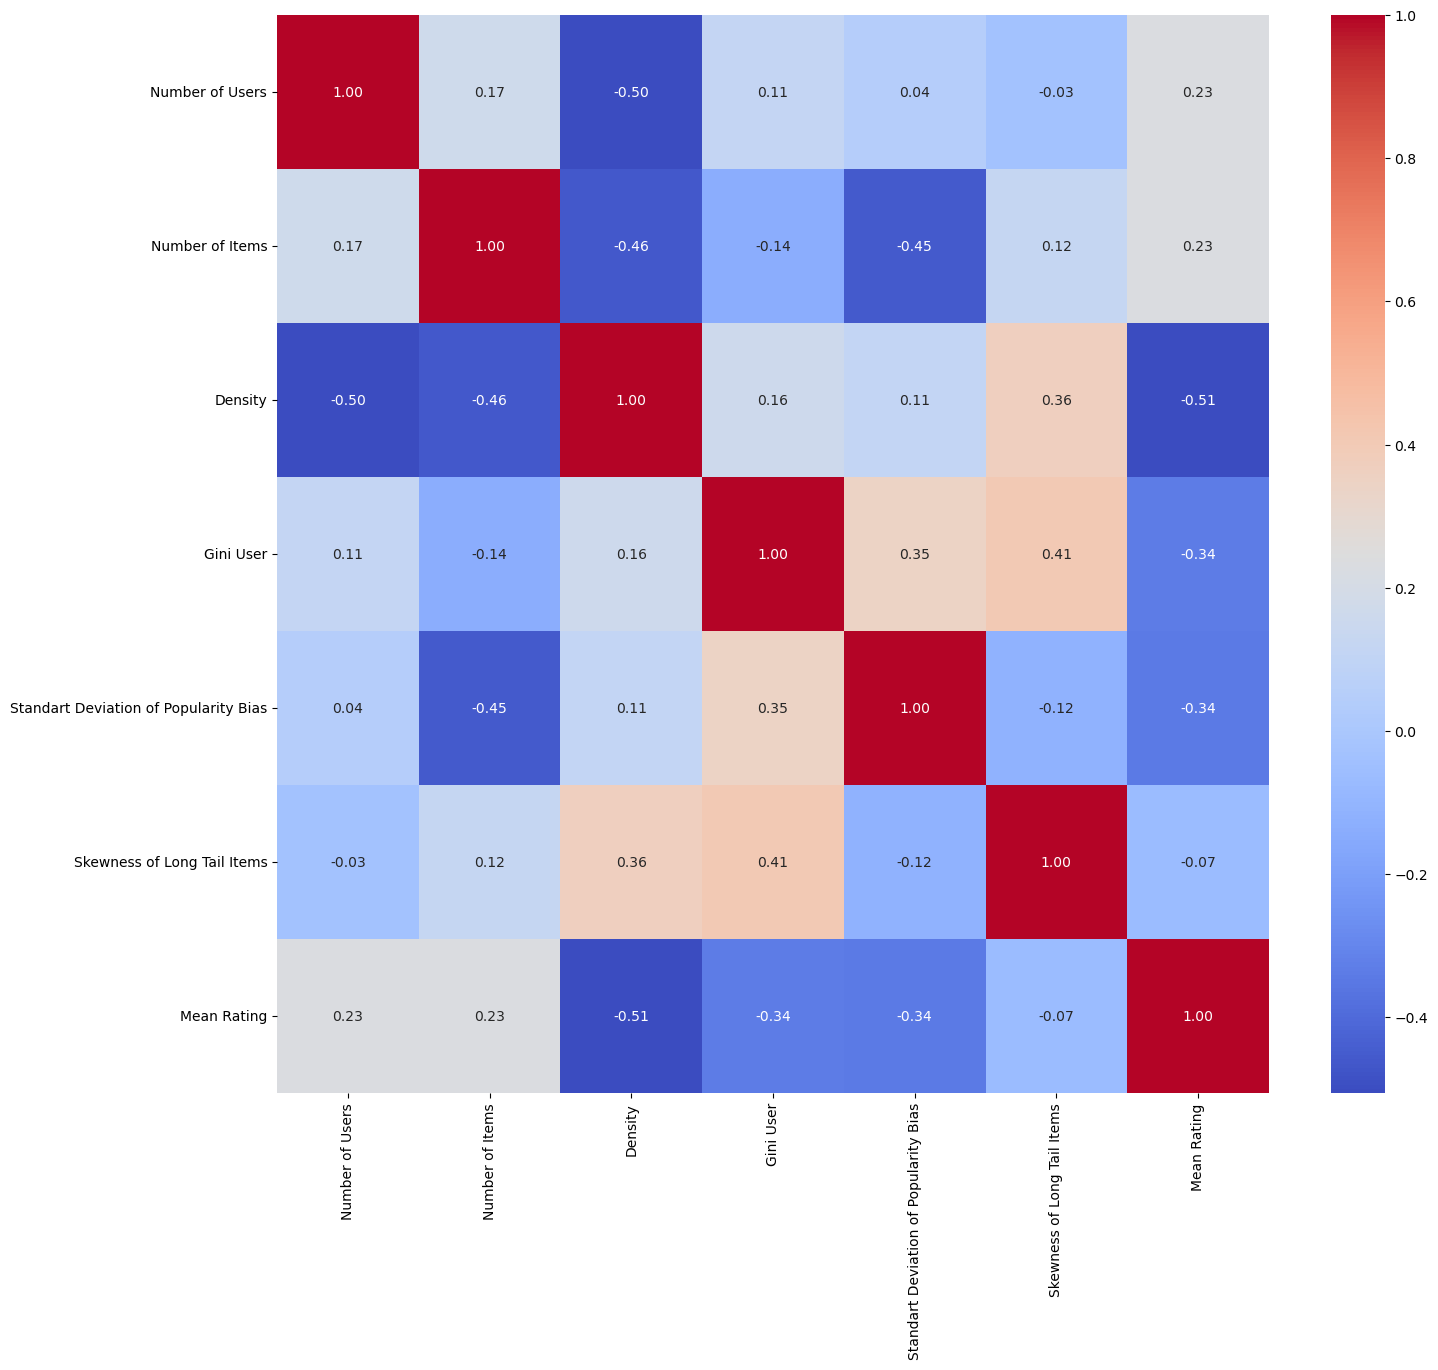

In [33]:
bx_age_dropped_7 = bx_age_dropped_7.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(bx_age_dropped_7,annot=True,fmt=".2f", cmap='coolwarm')

<Axes: >

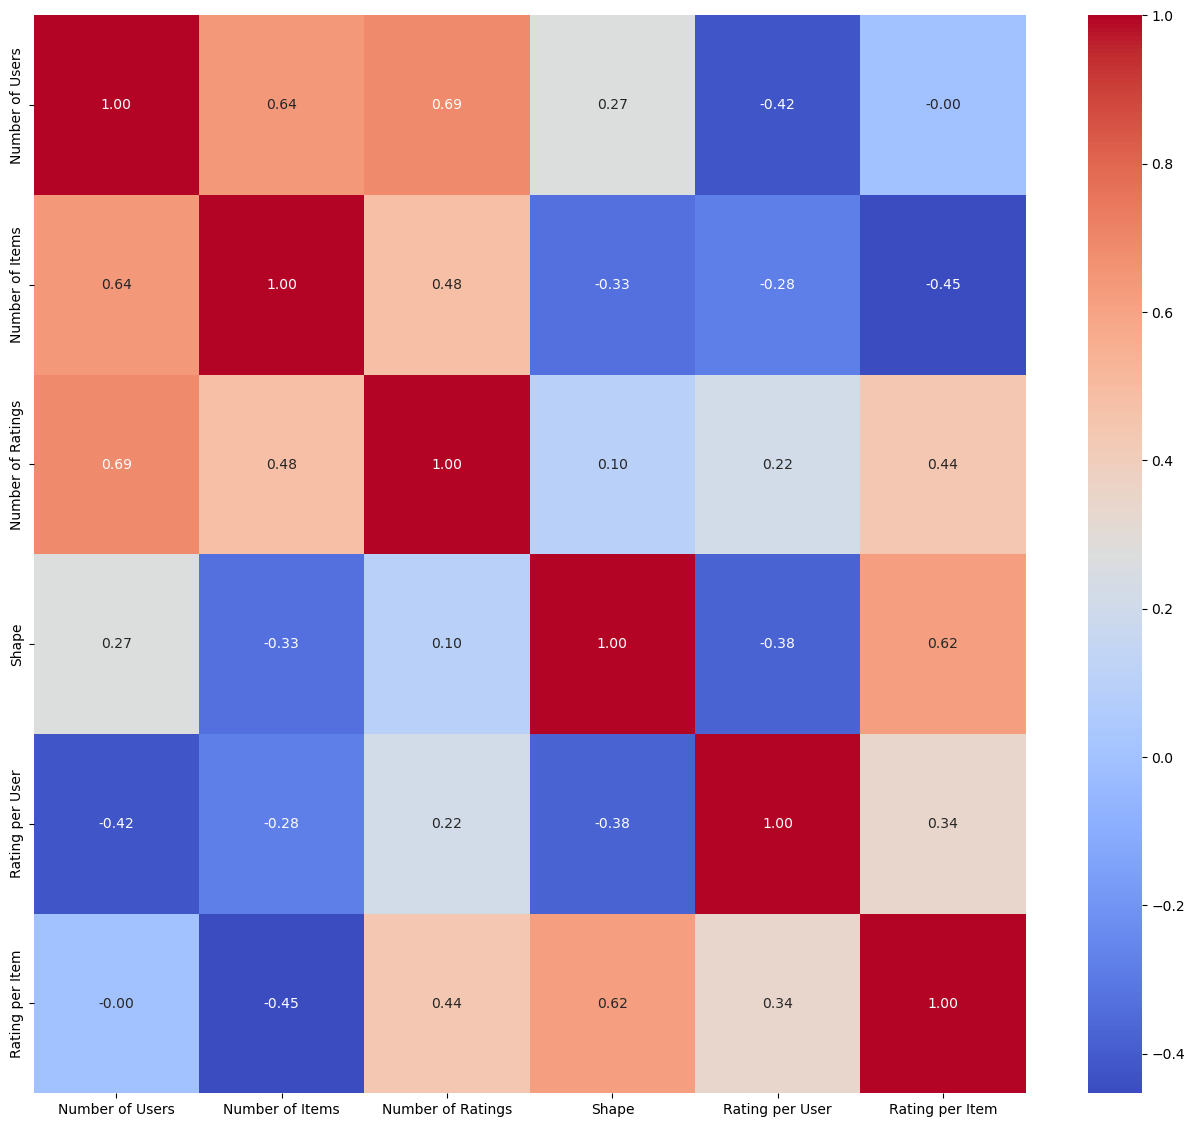

In [34]:
data_7 = data_7.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(data_7,annot=True,fmt=".2f", cmap='coolwarm')

<Axes: >

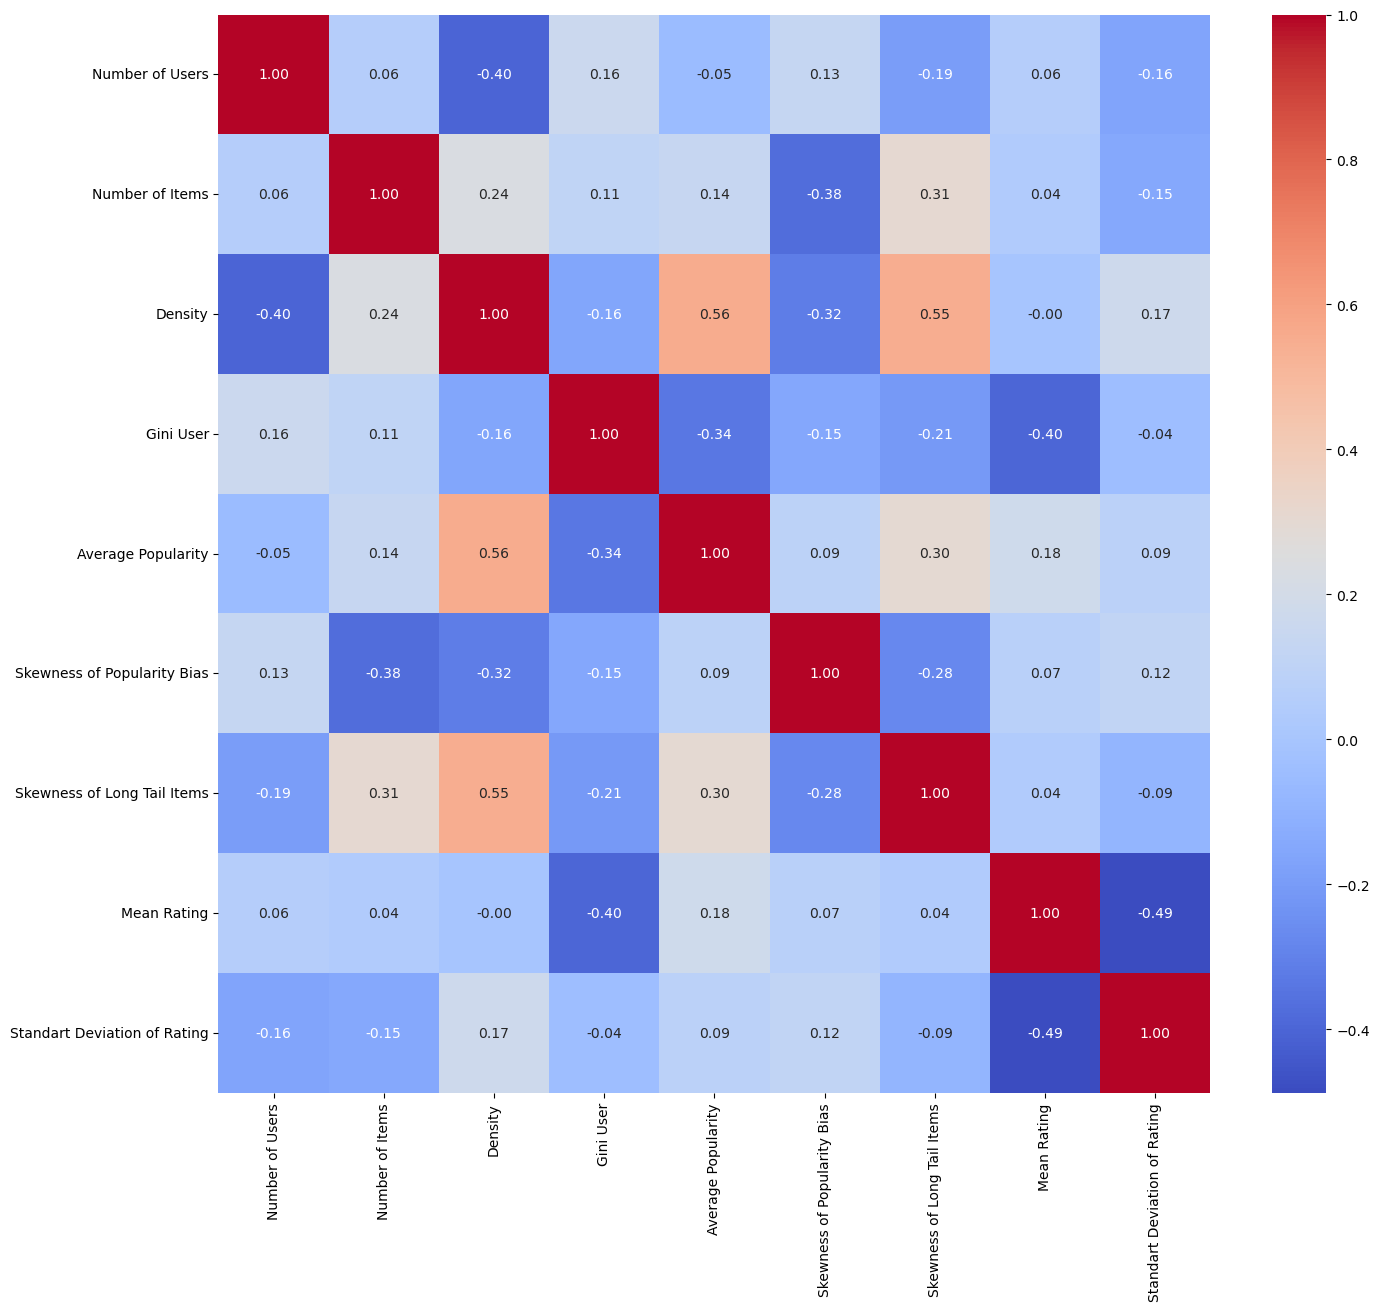

In [35]:
ml1_age_dropped_6 = ml1_age_dropped_6.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(ml1_age_dropped_6,annot=True,fmt=".2f", cmap='coolwarm')

<Axes: >

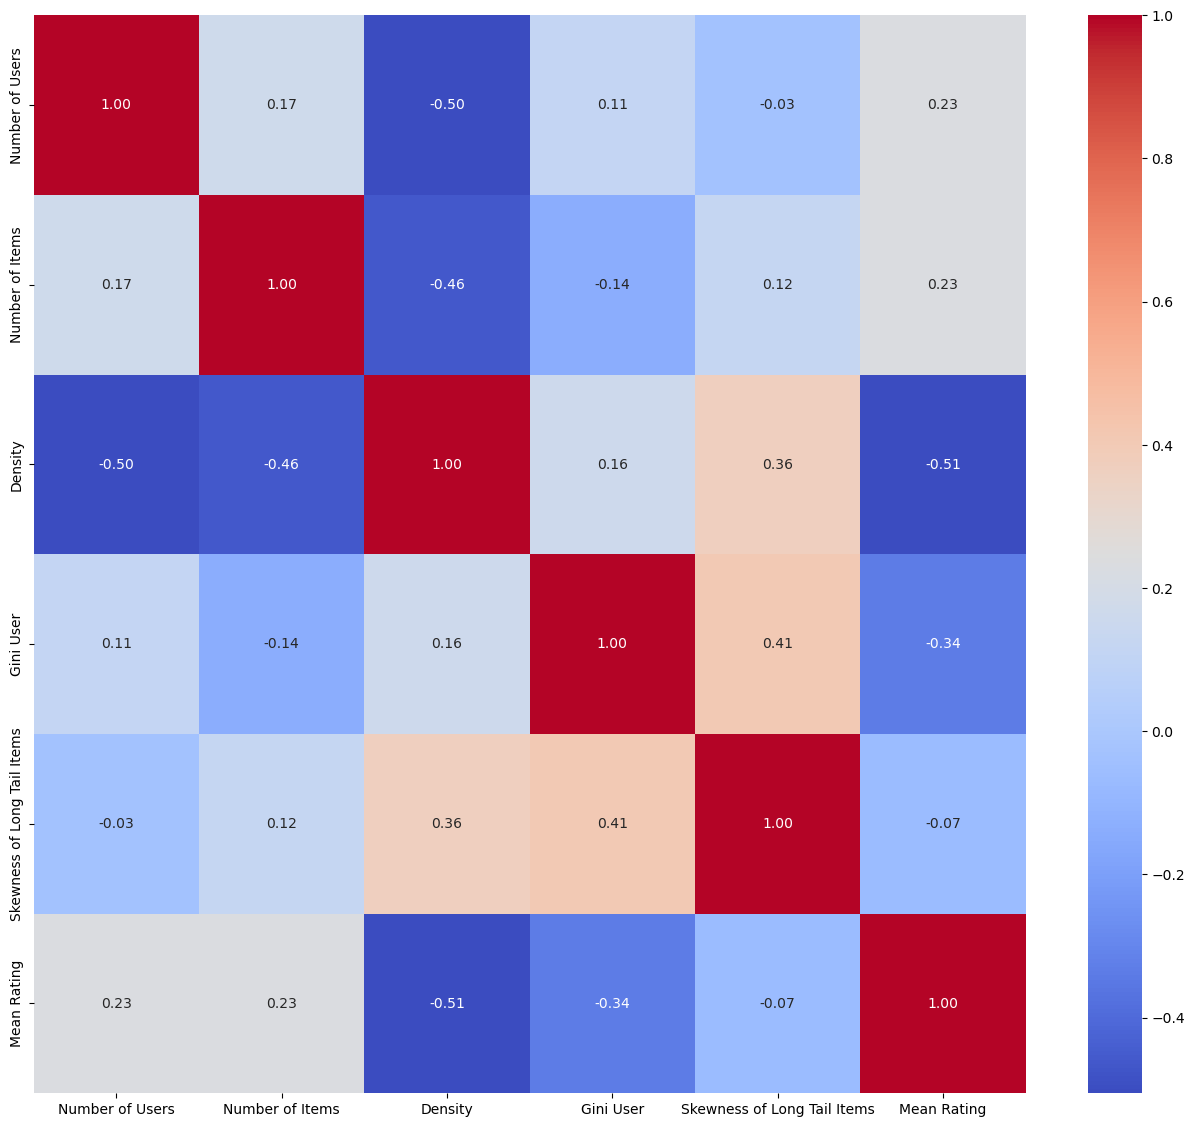

In [36]:
bx_age_dropped_6 = bx_age_dropped_6.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(bx_age_dropped_6,annot=True,fmt=".2f", cmap='coolwarm')

<Axes: >

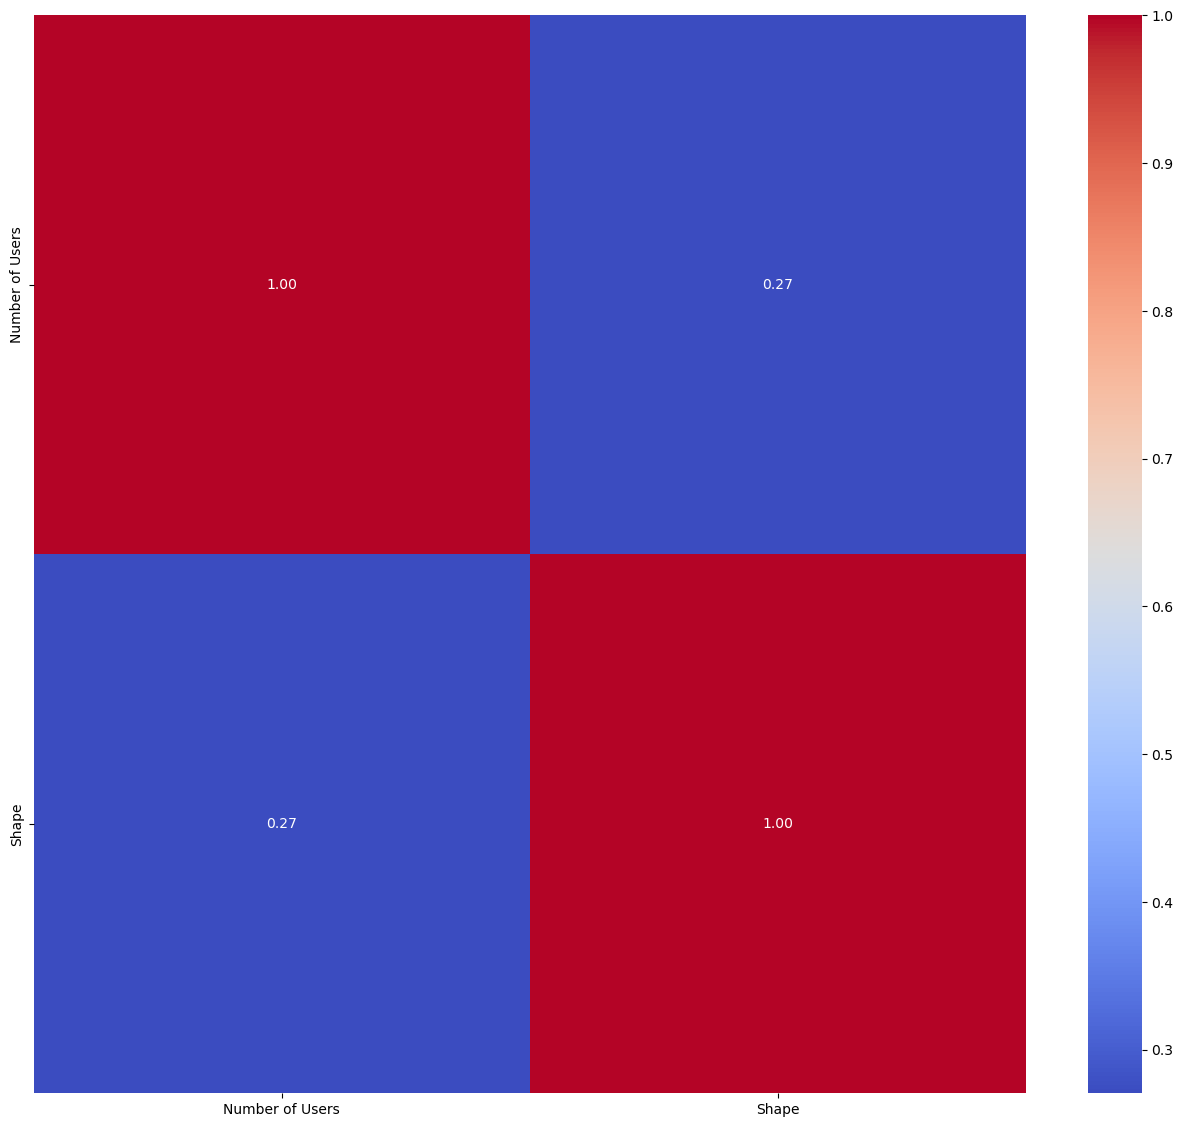

In [37]:
data_6 = data_6.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(data_6,annot=True,fmt=".2f", cmap='coolwarm')